In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.fc(x)
        return x

net = Net()
print(net)

Net(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)


In [2]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # fc's .weight
print(params[1].size())  # fc's .bias

2
torch.Size([10, 784])
torch.Size([10])


In [3]:
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[ 1.1170,  0.0909,  0.1573, -1.5932, -0.2604,  0.1902,  0.2116, -0.4925,
          1.0346, -0.1222]], grad_fn=<AddmmBackward0>)


In [4]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [5]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1706, grad_fn=<MseLossBackward0>)


In [6]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear

In [7]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('fc.bias.grad before backward')
print(net.fc.bias.grad)

loss.backward()

print('fc.bias.grad after backward')
print(net.fc.bias.grad)

fc.bias.grad before backward
None
fc.bias.grad after backward
tensor([ 0.3358, -0.0371,  0.0412, -0.4336,  0.1119,  0.0971,  0.2131, -0.0224,
         0.1958, -0.2412])


In [8]:
import torchvision
import torchvision.transforms as transforms

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 8

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 48504705.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 1642406.53it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 12912129.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 5526698.22it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


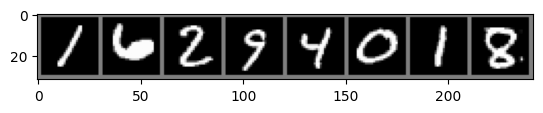

1     6     2     9     4     0     1     8    


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [11]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.fc(x)
        return x

net = Net()

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.530
[1,  4000] loss: 0.372
[1,  6000] loss: 0.349
[2,  2000] loss: 0.336
[2,  4000] loss: 0.319
[2,  6000] loss: 0.310
[3,  2000] loss: 0.292
[3,  4000] loss: 0.308
[3,  6000] loss: 0.318
[4,  2000] loss: 0.309
[4,  4000] loss: 0.287
[4,  6000] loss: 0.306
[5,  2000] loss: 0.291
[5,  4000] loss: 0.300
[5,  6000] loss: 0.297
[6,  2000] loss: 0.280
[6,  4000] loss: 0.301
[6,  6000] loss: 0.283
[7,  2000] loss: 0.280
[7,  4000] loss: 0.289
[7,  6000] loss: 0.286
[8,  2000] loss: 0.287
[8,  4000] loss: 0.288
[8,  6000] loss: 0.290
[9,  2000] loss: 0.269
[9,  4000] loss: 0.288
[9,  6000] loss: 0.291
[10,  2000] loss: 0.290
[10,  4000] loss: 0.269
[10,  6000] loss: 0.277
Finished Training


In [14]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

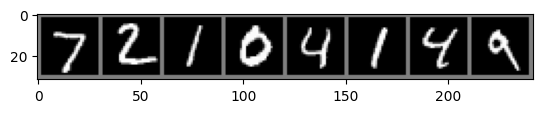

GroundTruth:  7     2     1     0     4     1     4     9    


In [15]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [17]:
outputs = net(images)
print(np.round(outputs.detach().numpy(), 2))

[[  0.16 -11.48   1.09   6.45  -3.38   0.31 -10.26  12.45   0.4    3.24]
 [  6.05   0.95  13.26   6.05 -15.38   7.21   9.06 -21.03   4.99 -12.11]
 [ -8.46   7.7    2.02   0.15  -2.9   -0.19   0.15   1.18   0.62  -1.53]
 [ 13.89 -14.38   3.22  -0.83  -6.48   2.23   2.97  -0.6   -0.59  -0.9 ]
 [ -0.99  -8.35   1.24  -4.22   7.05  -2.18   0.87   1.06   0.41   2.78]
 [ -9.57   9.01   1.79   1.04  -4.02  -2.04  -2.62   3.05   1.82   0.15]
 [ -5.81  -7.72  -6.68  -0.75   8.84   3.3   -1.81   1.56   3.64   3.87]
 [-11.48   2.5   -1.27  -0.63   1.24   0.94  -3.28   0.35   0.87   7.33]]


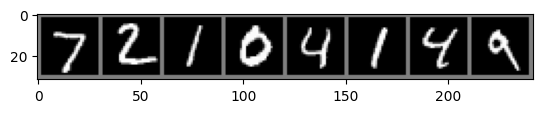

Predicted:  7     2     1     0     4     1     4     9    


In [18]:
_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(8)))

In [19]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 92 %


In [20]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 97.9 %
Accuracy for class: 1     is 98.2 %
Accuracy for class: 2     is 90.8 %
Accuracy for class: 3     is 90.4 %
Accuracy for class: 4     is 91.2 %
Accuracy for class: 5     is 85.4 %
Accuracy for class: 6     is 96.6 %
Accuracy for class: 7     is 93.1 %
Accuracy for class: 8     is 87.4 %
Accuracy for class: 9     is 90.8 %


In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [22]:
class MLPClassifier(nn.Module):
    def __init__(self):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(784, 20)  # First fully connected layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(20, 10)  # Second fully connected layer

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)  # Pass input through the first fully connected layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Pass output through the second fully connected layer
        return x

mlp = MLPClassifier()
mlp.to(device)
print(mlp)

MLPClassifier(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=10, bias=True)
)


In [23]:
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

In [24]:
# TODO: create a graph that shows how the losses and accuracies of the training and validation sets change over the epochs
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.657
[1,  4000] loss: 0.368
[1,  6000] loss: 0.342
[2,  2000] loss: 0.280
[2,  4000] loss: 0.277
[2,  6000] loss: 0.266
[3,  2000] loss: 0.230
[3,  4000] loss: 0.218
[3,  6000] loss: 0.216
[4,  2000] loss: 0.200
[4,  4000] loss: 0.206
[4,  6000] loss: 0.190
[5,  2000] loss: 0.182
[5,  4000] loss: 0.180
[5,  6000] loss: 0.190
[6,  2000] loss: 0.177
[6,  4000] loss: 0.169
[6,  6000] loss: 0.176
[7,  2000] loss: 0.161
[7,  4000] loss: 0.179
[7,  6000] loss: 0.161
[8,  2000] loss: 0.155
[8,  4000] loss: 0.162
[8,  6000] loss: 0.160
[9,  2000] loss: 0.146
[9,  4000] loss: 0.147
[9,  6000] loss: 0.161
[10,  2000] loss: 0.143
[10,  4000] loss: 0.148
[10,  6000] loss: 0.158
Finished Training


In [25]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = mlp(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 95 %


Epoch [1/10], Train Loss: 0.9181
Epoch [2/10], Train Loss: 0.8990
Epoch [3/10], Train Loss: 0.8883
Epoch [4/10], Train Loss: 0.8850
Epoch [5/10], Train Loss: 0.8835
Epoch [6/10], Train Loss: 0.8824
Epoch [7/10], Train Loss: 0.8815
Epoch [8/10], Train Loss: 0.8802
Epoch [9/10], Train Loss: 0.8789
Epoch [10/10], Train Loss: 0.8779
Test Loss: 0.8763


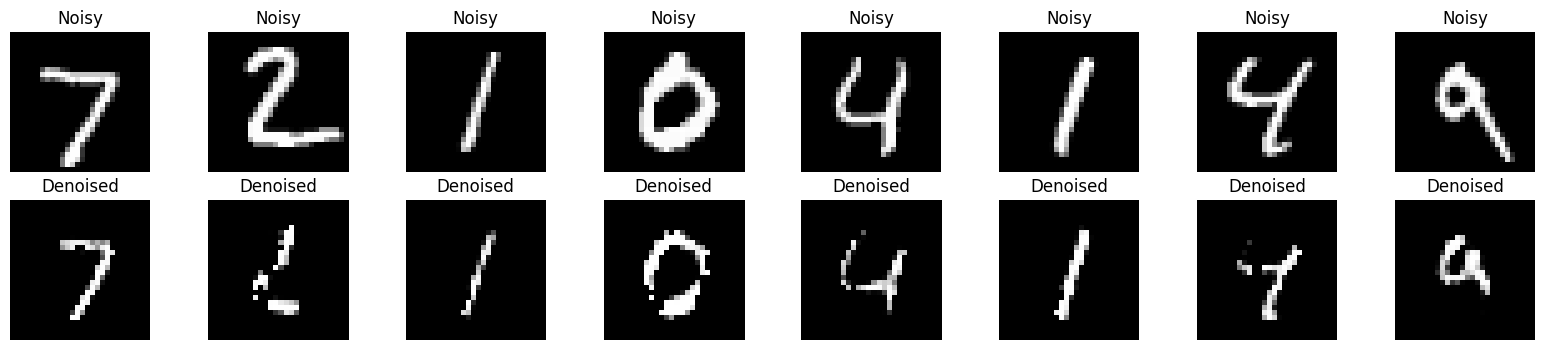

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Define the denoising autoencoder model
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x





# Add noise to the images
def add_noise(imgs, noise_factor=0.5):
    noise = torch.randn_like(imgs) * noise_factor
    noisy_imgs = imgs + noise
    return torch.clamp(noisy_imgs, 0., 1.)

# Define the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenoisingAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1).to(device)
        noisy_inputs = add_noise(inputs).to(device)

        optimizer.zero_grad()
        outputs = model(noisy_inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(trainloader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")

# Test the model
model.eval()
test_loss = 0.0
with torch.no_grad():
    for data in testloader:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1).to(device)
        noisy_inputs = add_noise(inputs).to(device)

        outputs = model(noisy_inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item() * inputs.size(0)

    test_loss /= len(testloader.dataset)
    print(f"Test Loss: {test_loss:.4f}")

# Display some results

def display_results(inputs, outputs, num_images=10):
    inputs = inputs.cpu().numpy().reshape(-1, 28, 28)
    outputs = outputs.cpu().numpy().reshape(-1, 28, 28)
    num_images = min(num_images, len(inputs))
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(inputs[i], cmap='gray')
        plt.title("Noisy")
        plt.axis('off')
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(outputs[i], cmap='gray')
        plt.title("Denoised")
        plt.axis('off')
    plt.show()



# Display some results
with torch.no_grad():
    inputs, _ = next(iter(testloader))
    inputs = inputs.view(inputs.size(0), -1).to(device)
    noisy_inputs = add_noise(inputs).to(device)
    outputs = model(noisy_inputs)
    display_results(inputs, outputs)
